In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('ggplot'

In [ ]:
train   =   pd.read_csv('train.csv')
test    =   pd.read_csv('test.csv')
members =   pd.read_csv('members.csv')
songs   =   pd.read_csv('songs.csv')

In [ ]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
test.head()


,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
songs.head()


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
members.head()


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
train = train.sample(frac=0.01)


In [ ]:
train = pd.merge(train, songs, on='song_id', how='left')


In [ ]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,reP6sppCKbYq6UiLI+83VmC/EgDWR8X8//pG/pQe/SY=,XBhJYp6A1sD/47vCwkjqqG0xK1lDPu/IUTlLEpx81Ns=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,zRfOEH4Bl09lWEbWtYVEp5CffQ5VBDcSNFLumK291As=,eaxR8ESct6krK4Ym7Uupq7B6ymiJztSiW3GF8FYj1Pk=,my library,Local playlist more,local-playlist,1.0,171363.0,242|726,寶寶水晶音樂,Sammy Fain |Jack Lawrence,Sammy Fain |Jack Lawrence,-1.0
2,+FpdbJGG98n1/7YKwUt39CIinpyvS72BrGnjk6VRhJQ=,l5kAbNRLLEoGdd03QmRhr+KxsvF2K2b87C8F/HuvxcE=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,SEXmGAIKrBLJvU2yqL7G0KUkKq81WgLwrzy/GHyPjYE=,my library,Local playlist more,local-library,1.0,242207.0,465,Jason Mraz,Jason Mraz,Jason Mraz,52.0
4,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,jTkf2XL2gwHzCOfl4OzZ+R2nH/BDcoXG9p4/PlyF0wQ=,my library,Local playlist more,local-library,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train = pd.merge(train, members, on='msno', how='left')
train.shape

(78, 18)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    78 non-null     object 
 1   song_id                 78 non-null     object 
 2   source_system_tab       78 non-null     object 
 3   source_screen_name      74 non-null     object 
 4   source_type             78 non-null     object 
 5   target                  78 non-null     float64
 6   song_length             19 non-null     float64
 7   genre_ids               18 non-null     object 
 8   artist_name             19 non-null     object 
 9   composer                16 non-null     object 
 10  lyricist                15 non-null     object 
 11  language                19 non-null     float64
 12  city                    78 non-null     int64  
 13  bd                      78 non-null     int64  
 14  gender                  39 non-null     obje

In [ ]:
np.mean(train.target)


0.7692307692307693

In [ ]:
null_check = train.isnull()


In [ ]:
print((null_check.sum()/null_check.count())*100)


msno                       0.000000
song_id                    0.000000
source_system_tab          0.000000
source_screen_name         5.128205
source_type                0.000000
target                     0.000000
song_length               75.641026
genre_ids                 76.923077
artist_name               75.641026
composer                  79.487179
lyricist                  80.769231
language                  75.641026
city                       0.000000
bd                         0.000000
gender                    50.000000
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [ ]:
for j in train.select_dtypes(include=['object']).columns:
    train[j][train[j].isnull()] = 'unknown'
    
train = train.fillna(value=0)

In [ ]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,kQkq+l+AK15u8Pd099PEyttuJ751PZCLAThZHc0Zs64=,nxFf702AZs2zkZktQNBMXzdATyA+hI3uFzxHyltNJo4=,my library,Local playlist more,local-library,1.0,0.0,unknown,unknown,unknown,unknown,0.0,21,32,male,9,20101129,20170717
1,Si1VDrF5fS1UWrJQln2dAPmWfifWmeW2bBhiCHlt0Vs=,gcqhMI67ktwNMh8MVQdvtDIGD6PIWedZOKhk6qhyjow=,my library,Local playlist more,local-library,1.0,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,7,20151126,20170930
2,E8yVcD/GcpkDrsnt4eC0b+5kBo5t3cEM4ZUs25Bxq2c=,sCIeSN67GLcRv9MlS/+0FBeK7LDgao7TSbLOQpjj+5E=,my library,Local playlist more,local-library,0.0,0.0,unknown,unknown,unknown,unknown,0.0,1,0,unknown,7,20140128,20170920
3,9Lk9RMHmpdKO5j7Sz1JwgkU5CANMqO8lkaWGni4CvPE=,mzGtmUOe5+GRECrhCjAkq963XgkOeVY1qjkebGavBn8=,my library,Local playlist more,local-library,1.0,211173.0,444,Red Velvet,Korean Lyrics by Cho| Yun Kyoung (12.5%) Albi ...,Korean Lyrics by Cho| Yun Kyoung (12.5%) Albi ...,31.0,5,29,female,7,20150822,20170921
4,2b/lsijktqF+KJ4rWwg8+z649rZ0I7+bKdNU/Wr22mI=,sNEeEYFEPoo/24x5fNHW74XgBKwGIIkdsN4fh7WPyiM=,my library,Local playlist more,local-library,1.0,0.0,unknown,unknown,unknown,unknown,0.0,13,17,male,3,20150912,20170722


In [ ]:
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [ ]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')

In [ ]:
for j in train.select_dtypes(include=['category']).columns:
    train[j] = train[j].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = train.drop(['target'], axis = 1).values
y_train = train['target'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc = RandomForestClassifier(n_estimators=250)


In [ ]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=250)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
rfc_pred = rfc.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,rfc_pred))


[[ 0  3]
 [ 2 19]]


In [ ]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.86      0.90      0.88        21

    accuracy                           0.79        24
   macro avg       0.43      0.45      0.44        24
weighted avg       0.76      0.79      0.77        24



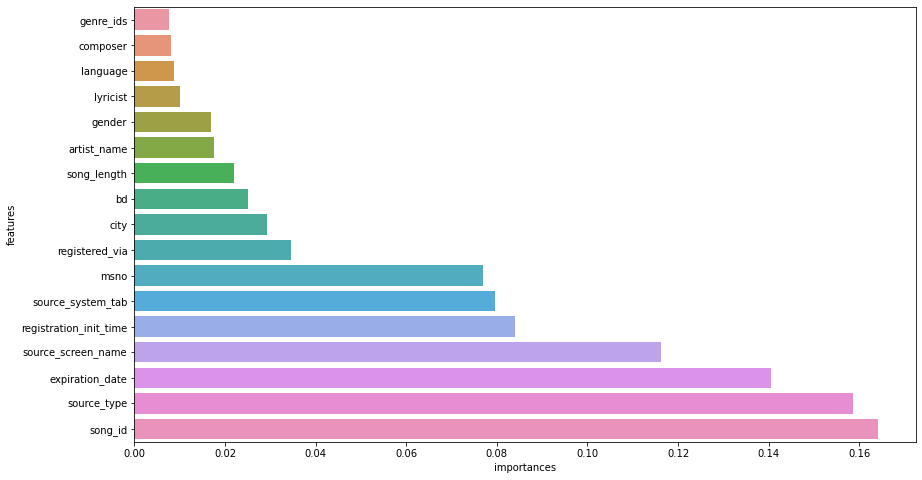

In [ ]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()